In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pyecharts import Pie
import missingno as msno
from sklearn import metrics as mt

from attr import *

## 导入数据

In [2]:
data = pd.read_excel('data_cn.xlsx')
data.loc[data.label ==2,'label'] = 0
data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


## 数据转换为数值

In [3]:
data_tranfer = data.copy()
for column, map_value in maping.items():
    data_tranfer[column] = data[column].map(map_value)
data_tranfer.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,100,6,0,A43,1169,1,10,4,A93,0,...,4,67,A143,2,2,3,1,1,1,1
1,200,48,2,A43,5951,100,4,2,A92,0,...,4,22,A143,2,1,3,1,0,1,0
2,0,12,0,A46,2096,100,7,2,A93,0,...,4,49,A143,2,1,2,2,0,1,1
3,100,42,2,A42,7882,100,7,2,A93,2,...,3,45,A143,0,1,3,2,0,1,1
4,100,24,1,A40,4870,100,4,3,A93,0,...,1,53,A143,0,2,3,2,0,1,0


In [4]:
drop_cols = ['Other_installment_plans', 'Personal_status_and_sex', 'Purpose']
data_drop = data_tranfer.drop(labels=drop_cols, axis=1)
data_drop.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,guarantors,Present_residence_since,Property,Age,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,100,6,0,1169,1,10,4,0,4,4,67,2,2,3,1,1,1,1
1,200,48,2,5951,100,4,2,0,2,4,22,2,1,3,1,0,1,0
2,0,12,0,2096,100,7,2,0,3,4,49,2,1,2,2,0,1,1
3,100,42,2,7882,100,7,2,2,4,3,45,0,1,3,2,0,1,1
4,100,24,1,4870,100,4,3,0,4,1,53,0,2,3,2,0,1,0


### z-score 规范化

In [5]:
from sklearn.preprocessing import StandardScaler # 导入模块

col = data_drop.columns.drop('label') #剔除目标变量
data_scale = data_drop.copy()
sc =StandardScaler() # 初始化缩放器
data_scale[col] =sc.fit_transform(data_scale[col]) #对数据进行标准化
data_scale.head() #查看经标准化后的数据

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,guarantors,Present_residence_since,Property,Age,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,-0.057803,-1.236478,-1.344014,-0.745131,-0.584510,1.387862,0.918477,-0.303686,1.046987,1.293723,2.766456,0.585603,1.027079,0.146949,-0.428290,1.214598,0.196014,1
1,0.845372,2.248194,0.503428,0.949817,-0.370176,-0.374876,-0.870183,-0.303686,-0.765977,1.293723,-1.191404,0.585603,-0.704926,0.146949,-0.428290,-0.823318,0.196014,0
2,-0.960978,-0.738668,-1.344014,-0.416562,-0.370176,0.506493,-0.870183,-0.303686,0.140505,1.293723,1.183312,0.585603,-0.704926,-1.383771,2.334869,-0.823318,0.196014,1
3,-0.057803,1.750384,0.503428,1.634247,-0.370176,0.506493,-0.870183,3.885083,1.046987,0.341055,0.831502,-2.379476,-0.704926,0.146949,2.334869,-0.823318,0.196014,1
4,-0.057803,0.256953,-0.420293,0.566664,-0.370176,-0.374876,0.024147,-0.303686,1.046987,-1.564281,1.535122,-2.379476,1.027079,0.146949,2.334869,-0.823318,0.196014,0


## 过采样

In [39]:
# 构建自变量和因变量
X = data_scale.drop('label', axis=1)
y = data['label']

In [33]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_sample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

通过SMOTE方法平衡正负样本后
样本个数：1400; 正样本占50.00%; 负样本占50.00%


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # random_state = 0 每次切分的数据都一样

### 网格搜索

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from plot_comfusion_matrix import *

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k_range = list(range(1,20))
weight_options = ['uniform', 'distance']
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

param_knn = dict(n_neighbors=k_range, weights=weight_options, algorithm=algorithm)
#rand_knn = GridSearchCV(knn, param_knn, cv=10, scoring='accuracy')
rand_knn = RandomizedSearchCV(knn, param_knn, cv=10, scoring='accuracy',n_iter=10, random_state=5)
rand_knn.fit(X_train, y_train)
print("knn_best:%f" %rand_knn.best_score_)

knn_best:0.752857


In [43]:
from sklearn.metrics import accuracy_score
y_knn_pred = rand_knn.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

accuracy: 0.693333333333
             precision    recall  f1-score   support

          0       0.44      0.28      0.34        86
          1       0.75      0.86      0.80       214

avg / total       0.66      0.69      0.67       300



In [44]:
roc_auc1 = roc_auc_score(y_test, y_knn_pred)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.569441


Confusion matrix, without normalization
[[ 24  62]
 [ 30 184]]


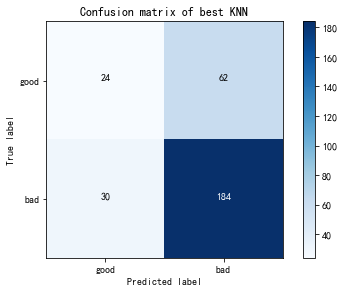

In [46]:
cm = confusion_matrix(y_test, y_knn_pred)    
classs = ['good', 'bad']
plot_confusion_matrix(cm, classes=classs,normalize=False, title='Confusion matrix of best KNN')